In [1]:
# packages to load for data analysis
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Unzip and load the Amazon reviews data 
df = pd.read_csv('Reviews.csv')
df.head() 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
!pip install keras.preprocessing

In [4]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [5]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [6]:
# assign reviews with score > 3 as positive sentiment, score < 3 negative sentiment, remove score = 3
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

In [7]:
df_sub = df[["Summary","sentiment"]]
df_sub = df_sub.dropna(subset=['Summary'])

In [8]:
df_sub.shape

(525789, 2)

In [9]:
# then continue with your splitting code
index = df_sub.index
df_sub['random_number'] = np.random.randn(len(index))
train = df_sub[df_sub['random_number'] <= 0.8]
test = df_sub[df_sub['random_number'] > 0.8]

In [10]:
X_train = train[['Summary']]
y_train = train['sentiment']

In [11]:
X_train.shape, y_train.shape

((414094, 1), (414094,))

In [12]:
X_test = test[['Summary']]
y_test = test['sentiment']

In [13]:
X_test.shape, y_test.shape

((111695, 1), (111695,))

In [14]:
## create tokens for every word in the Summary
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train['Summary'].values)  # use values to get the underlying numpy array of strings
word_index = tokenizer.word_index

In [15]:
## create tokens for every word in the Summary
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [16]:
# Reset indices before converting to NumPy array
training_labels = y_train.reset_index(drop=True).to_numpy()
testing_labels = y_test.reset_index(drop=True).to_numpy()

In [17]:
len(training_labels)

414094

In [18]:


# ## create tokens for every word in the Summary
# tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
# # use values to get the underlying numpy array of strings
# tokenizer.fit_on_texts(X_train['Summary'].values)  
# word_index = tokenizer.word_index

## create training sequences and pad
training_sequences = tokenizer.texts_to_sequences(X_train['Summary'].values)  
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_labels = np.array(y_train)


In [19]:
## create training sequences and pad
testing_sequences = tokenizer.texts_to_sequences(X_test['Summary'].values)  
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_labels = np.array(y_test)

In [20]:
training_padded[0]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [21]:
training_padded.shape

(414094, 100)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['FalsePositives'])

In [23]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
num_epochs = 25
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/25
12941/12941 - 10s - loss: 0.6194 - false_positives: 0.0000e+00 - val_loss: 0.6182 - val_false_positives: 0.0000e+00 - 10s/epoch - 764us/step
Epoch 2/25
12941/12941 - 10s - loss: 0.6184 - false_positives: 0.0000e+00 - val_loss: 0.6174 - val_false_positives: 0.0000e+00 - 10s/epoch - 778us/step
Epoch 3/25
12941/12941 - 10s - loss: 0.6181 - false_positives: 0.0000e+00 - val_loss: 0.6182 - val_false_positives: 0.0000e+00 - 10s/epoch - 788us/step
Epoch 4/25
12941/12941 - 10s - loss: 0.6179 - false_positives: 0.0000e+00 - val_loss: 0.6168 - val_false_positives: 0.0000e+00 - 10s/epoch - 806us/step
Epoch 5/25
12941/12941 - 10s - loss: 0.6176 - false_positives: 0.0000e+00 - val_loss: 0.6165 - val_false_positives: 0.0000e+00 - 10s/epoch - 808us/step
Epoch 6/25
12941/12941 - 11s - loss: 0.6172 - false_positives: 0.0000e+00 - val_loss: 0.6161 - val_false_positives: 0.0000e+00 - 11s/epoch - 819us/step
Epoch 7/25
12941/12941 - 11s - loss: 0.6168 - false_positives: 0.0000e+00 - val_loss: 0.

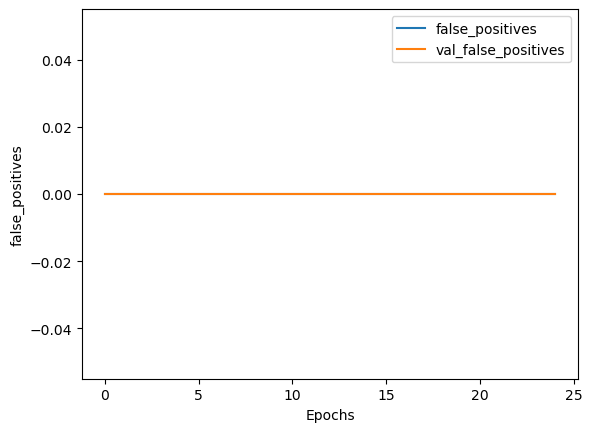

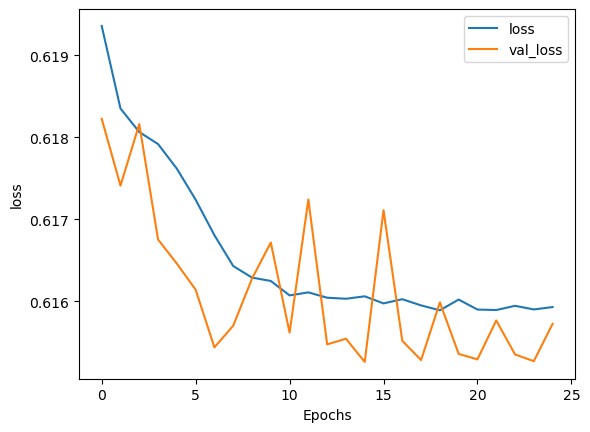

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "false_positives")
plot_graphs(history, "loss")

In [27]:
# Define the reverse_word_index
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}

# Train the model
num_epochs = 10
history = model.fit(
    training_padded, y_train,
    epochs=num_epochs,
    validation_data=(testing_padded, y_test),
    verbose=2
)

# Decoding function for sequences
def decode_sequence(sequence):
    return ' '.join([reverse_word_index.get(i, '<OOV>') for i in sequence])

# Example decoding
print(decode_sequence(training_padded[0]))
print(decode_sequence(training_padded[2]))
print(y_train[2])


Epoch 1/10
12941/12941 - 13s - loss: 0.6158 - false_positives: 0.0000e+00 - val_loss: 0.6156 - val_false_positives: 0.0000e+00 - 13s/epoch - 983us/step
Epoch 2/10
12941/12941 - 13s - loss: 0.6157 - false_positives: 0.0000e+00 - val_loss: 0.6164 - val_false_positives: 0.0000e+00 - 13s/epoch - 981us/step
Epoch 3/10
12941/12941 - 13s - loss: 0.6158 - false_positives: 0.0000e+00 - val_loss: 0.6152 - val_false_positives: 0.0000e+00 - 13s/epoch - 1ms/step
Epoch 4/10
12941/12941 - 13s - loss: 0.6158 - false_positives: 0.0000e+00 - val_loss: 0.6153 - val_false_positives: 0.0000e+00 - 13s/epoch - 1ms/step
Epoch 5/10
12941/12941 - 13s - loss: 0.6158 - false_positives: 0.0000e+00 - val_loss: 0.6153 - val_false_positives: 0.0000e+00 - 13s/epoch - 1ms/step
Epoch 6/10
12941/12941 - 13s - loss: 0.6158 - false_positives: 0.0000e+00 - val_loss: 0.6158 - val_false_positives: 0.0000e+00 - 13s/epoch - 988us/step
Epoch 7/10
12941/12941 - 13s - loss: 0.6158 - false_positives: 0.0000e+00 - val_loss: 0.6152 -

In [28]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)


(10000, 16)


In [29]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    if word_num in reverse_word_index:
        word = reverse_word_index[word_num]
        embeddings = weights[word_num]
        out_m.write(word + "\n")
        out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


In [42]:
# Save the trained model
model.save('sentiment_model.h5')

# Load the saved model
loaded_model = tf.keras.models.load_model('sentiment_model.h5')

# Evaluate the loaded model on the testing data
loss, false_positives = loaded_model.evaluate(testing_padded, y_test)
accuracy = 1 - false_positives  # Calculate accuracy based on false positives

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

# Predict sentiment for new sentences using the loaded model
new_sentences = ["I highly recommend this product!", "This is the worst item I've ever purchased."]
new_sequences = tokenizer.texts_to_sequences(new_sentences)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

new_predictions = loaded_model.predict(new_padded_sequences)

for sentence, prediction in zip(new_sentences, new_predictions):
    sentiment = "Postive" if prediction > 0.5 else "Negative"
    print(f"Sentence: {sentence}\nSentiment: {sentiment}\n")


3491/3491 [==============================] - 1s 256us/step - loss: 0.6156 - false_positives: 0.0000e+00
Loss: 0.6156127452850342
Accuracy: 1.0
1/1 [==============================] - 0s 16ms/step
Sentence: I highly recommend this product!
Sentiment: Postive

Sentence: This is the worst item I've ever purchased.
Sentiment: Postive



In [34]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 9ms/step
[[0.53092605]
 [0.58356035]]


In [35]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predictions = loaded_model.predict(padded)

for sent, pred in zip(sentence, predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Sentence: {sent}\nSentiment: {sentiment}\n")


1/1 [==============================] - 0s 8ms/step
Sentence: granny starting to fear spiders in the garden might be real
Sentiment: Positive

Sentence: game of thrones season finale showing this sunday night
Sentiment: Positive

